# Task 4.10 PART 1 of 2

# Table Of Contents

## 1. Data Import
## 2. PII Data Security Implications
## 3. Customer Behavior per Geographical Area
## 4. Identifying Low Activity Customers
## 5. Customer Profiling for Marketing Strategies
## 6. Distribution of Customer Profiles Visualization
## 7. Profiles Usage Frequency and Expenditure
## 8. Customer Comparison via Rgions and Departments

# 1. Data Import

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\asus\Instacart Basket Analysis 01-2024'

In [12]:
# import datafgrame from previous Task
IC_full_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [14]:
IC_full_merge['days_since_prior_order'] = IC_full_merge['days_since_prior_order'].astype('float32')

In [15]:
crosstab = pd.crosstab(IC_full_merge['days_since_prior_order'], IC_full_merge['order_number'], dropna = False)

In [16]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,88999,91741,86503,81859,77583,73584,70020,64468,63154,...,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,120681,122871,114644,106764,100756,95954,89752,87203,78634,...,754,842,940,1014,835,570,490,602,485,542
7.0,0,184802,181656,167597,157442,143628,137675,128423,120734,114769,...,634,573,521,440,602,421,420,378,419,322
8.0,0,112324,110742,102217,94945,87611,81622,78760,71070,67567,...,238,262,228,244,275,232,234,143,137,84


In [17]:
crosstab.to_clipboard()

In [25]:
IC_full_merge['days_since_prior_order'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32404859 entries, 0 to 32404858
Series name: days_since_prior_order
Non-Null Count     Dtype  
--------------     -----  
30328763 non-null  float32
dtypes: float32(1)
memory usage: 123.6 MB


# 2. PII Data Security Implications


In [5]:
#check types of columns

IC_full_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int32         
 1   First Name              object        
 2   Surname                 object        
 3   Gender                  object        
 4   State                   object        
 5   Age                     int64         
 6   Date_joined             datetime64[ns]
 7   Dependants              int64         
 8   Family_status           object        
 9   income                  int64         
 10  product_id              int64         
 11  product_name            object        
 12  aisle_id                int64         
 13  department_id           int64         
 14  prices                  float64       
 15  order_id                int32         
 16  order_number            int8          
 17  orders_day_of_week      int8          
 18  

This particular dataframe contains PII related information. It contains First and last name, gender, which state the customer lives in, how many dependants, age, and income. 

# 3. Customer Behavior per Geographical Area

Creating US regions where states are divided into regions

In [6]:
# create a Northeast region

IC_full_merge.loc[(IC_full_merge['State']=='Maine') | 
              (IC_full_merge['State']=='New Hampshire')|
              (IC_full_merge['State']=='Vermont') |
              (IC_full_merge['State']=='Massachusetts') |
              (IC_full_merge['State']=='Rhode Island') |
              (IC_full_merge['State']=='Connecticut')|
              (IC_full_merge['State']=='New York')|
              (IC_full_merge['State']=='Pennsylvania')|
              (IC_full_merge['State']=='New Jersey') , 'region']='Northeast'

In [7]:
# create a Midwest region

IC_full_merge.loc[(IC_full_merge['State']=='Wisconsin') | 
              (IC_full_merge['State']=='Michigan')|
              (IC_full_merge['State']=='Illinois') |
              (IC_full_merge['State']=='Indiana') |
              (IC_full_merge['State']=='Ohio') |
              (IC_full_merge['State']=='North Dakota')|
              (IC_full_merge['State']=='South Dakota')|
              (IC_full_merge['State']=='Nebraska')|
              (IC_full_merge['State']=='Kansas')|
              (IC_full_merge['State']=='Minnesota')|
              (IC_full_merge['State']=='Iowa')|
              (IC_full_merge['State']=='Missouri') , 'region']='Midwest'

In [8]:
# create a South region

IC_full_merge.loc[(IC_full_merge['State']=='Delaware')|
              (IC_full_merge['State']=='Maryland')|
              (IC_full_merge['State']=='District of Columbia')|
              (IC_full_merge['State']=='Virginia')|
              (IC_full_merge['State']=='West Virginia')|
              (IC_full_merge['State']=='North Carolina')|
              (IC_full_merge['State']=='South Carolina')|
              (IC_full_merge['State']=='Georgia')|
              (IC_full_merge['State']=='Florida')|
              (IC_full_merge['State']=='Kentucky')|
              (IC_full_merge['State']=='Tennessee')|
              (IC_full_merge['State']=='Mississippi')|
              (IC_full_merge['State']=='Alabama')|
              (IC_full_merge['State']=='Oklahoma')|
              (IC_full_merge['State']=='Texas')|
              (IC_full_merge['State']=='Arkansas')|
              (IC_full_merge['State']=='Louisiana'), 'region']='South'

In [9]:
# create a West region

IC_full_merge.loc[(IC_full_merge['State']=='Idaho')|
              (IC_full_merge['State']=='Montana')|
              (IC_full_merge['State']=='Wyoming')|
              (IC_full_merge['State']=='Nevada')|
              (IC_full_merge['State']=='Utah')|
              (IC_full_merge['State']=='Colorado')|
              (IC_full_merge['State']=='Arizona')|
              (IC_full_merge['State']=='New Mexico')|
              (IC_full_merge['State']=='Alaska')|
              (IC_full_merge['State']=='Washington')|
              (IC_full_merge['State']=='Oregon')|
              (IC_full_merge['State']=='California')|
              (IC_full_merge['State']=='Hawaii'), 'region']='West'

In [10]:
# value counts by regions
IC_full_merge['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [11]:
# frequency of values in 'region' column

IC_full_merge['spender_flag'].value_counts(dropna=False)

spender_flag
low spender     31770614
high spender      634245
Name: count, dtype: int64

In [12]:
# crossing the variable region with the spender_flag 2
crosstab = pd.crosstab(IC_full_merge['region'], IC_full_merge['spender_flag'], dropna = False)

In [13]:
crosstab

spender_flag,high spender,low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [14]:
# export crossing data to excel
crosstab.to_clipboard()

Excel Sheet Final Data Spending Habits:

region	    high spender  low spender	total spenders	% high spenders	% low spenders	% total spenders by region
Midwest	    155,975	      7,441,350	    7,597,325	      2.05	           97.95	         23.45
Northeast	108,225	      5,614,511	    5,722,736	      1.89	           98.11	         17.66
South	    209,691	      10,582,194	10,791,885	      1.94	           98.06	         33.30
West	    160,354	      8,132,559	    8,292,913	      1.93	           98.07	         25.59
		                      TOTAL:	32,404,859			


FINDINGS:
1. The South region has the highest percentage of total spenders overall in the US
2. The Midwest region has the highest percentage of high spenders in the US
3. The Northeast region has the highest percentage of low spenders in the US
4. The Northeast regioan has the lowest percentage of high spenders in the US
5. The Midwest has the lowest percentage of low spenders in the US


# 4. Identifying Low Activity Customers

In [15]:
# Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

IC_full_merge.loc[IC_full_merge['max_order']<5,'exclusion_flag']='low_activity_cust'

In [16]:
IC_full_merge['exclusion_flag'].value_counts(dropna=False)

exclusion_flag
nan                  30964564
low_activity_cust     1440295
Name: count, dtype: int64

In [17]:
# create new dataframe excluding low activity customers

IC_full_merge2=IC_full_merge[IC_full_merge['exclusion_flag'] !='low_activity_cust']

In [18]:
IC_full_merge2['exclusion_flag'].value_counts()

exclusion_flag
nan    30964564
Name: count, dtype: int64

In [19]:
IC_full_merge2.shape

(30964564, 35)

In [20]:
IC_full_merge['exclusion_flag'].value_counts()

exclusion_flag
nan                  30964564
low_activity_cust     1440295
Name: count, dtype: int64

In [21]:
IC_full_merge.shape

(32404859, 35)

In [21]:
#export the new data frame excluding low-activity customers. 
IC_full_merge2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_full_merge2.pkl'))

# 5. Customer Profiling for Marketing Strategies

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### Profiling Age

In [22]:
IC_full_merge2['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [24]:
# create an age_group based on ages from 0 to 33 
IC_full_merge2.loc[IC_full_merge2['Age'] <33, 'age_group'] = 'Young Adult'

In [25]:
# create an age_group based on ages from 33 to 65 
IC_full_merge2.loc[(IC_full_merge['Age']>=33) & (IC_full_merge['Age']<65),'age_group']= 'Adult'

In [26]:
# create an age_group based on ages from 65 and up

IC_full_merge2.loc[IC_full_merge['Age']>=65,'age_group']= 'Senior Adult'

In [27]:
# check the value count

IC_full_merge2['age_group'].value_counts(dropna=False)

age_group
Adult           15483886
Senior Adult     8195544
Young Adult      7285134
Name: count, dtype: int64

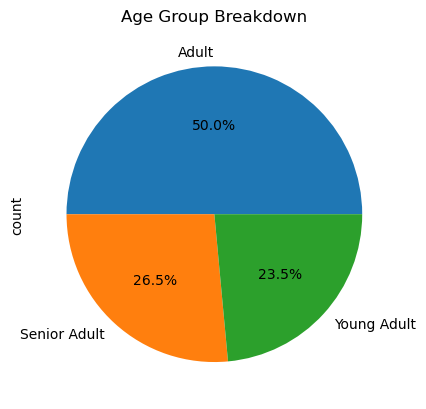

In [36]:
pie_age_gorup = IC_full_merge2['age_group'].value_counts().plot.pie(autopct='%1.1f%%', title='Age Group Breakdown')

In [38]:
# export image

pie_age_gorup.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profiliing_age_pie.png'))

### Profiling Income

In [28]:
IC_full_merge2['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
# create income_level column based on income less than 67292

IC_full_merge2.loc[IC_full_merge2['income']<67292,'income_level']= 'Low income'

In [31]:
# create income_level column based on income between 67292 and 128102

IC_full_merge2.loc[(IC_full_merge2['income']>=67292) & (IC_full_merge2['income']<128102),'income_level']= 'Median income'

In [32]:
# create income_level column based on income greater than 128102

IC_full_merge2.loc[IC_full_merge2['income']>=128102,'income_level']= 'High income'

In [33]:
# check the value count

IC_full_merge2['income_level'].value_counts()

income_level
Median income    15482298
High income       7741261
Low income        7741005
Name: count, dtype: int64

In [34]:
IC_full_merge2['income_level'].shape

(30964564,)

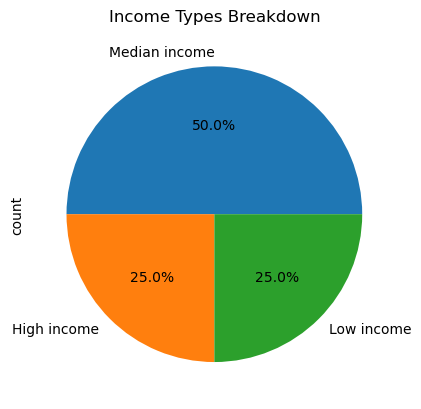

In [39]:
pie_income_level = IC_full_merge2['income_level'].value_counts().plot.pie(autopct='%1.1f%%', title='Income Types Breakdown')

In [40]:
# save image

pie_income_level.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profiliing_income_pie.png'))

### Profiling Number of Dependants

In [42]:
IC_full_merge2['Dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Dependants, dtype: float64

In [44]:
# create dependants_qty column based on 1 dependant

IC_full_merge2.loc[IC_full_merge2['Dependants'] == 1, 'dependants_qty'] = 1

In [45]:
# create a dependants_qty column based on 2 dependants

IC_full_merge2.loc[IC_full_merge2['Dependants'] == 2, 'dependants_qty'] = 2

In [46]:
# create a dependants_qty column based on 3 dependants

IC_full_merge2.loc[IC_full_merge2['Dependants'] == 3, 'dependants_qty'] = 3

In [47]:
# check the value count

IC_full_merge2['dependants_qty'].value_counts()

dependants_qty
3.0    7772516
2.0    7733261
1.0    7719106
Name: count, dtype: int64

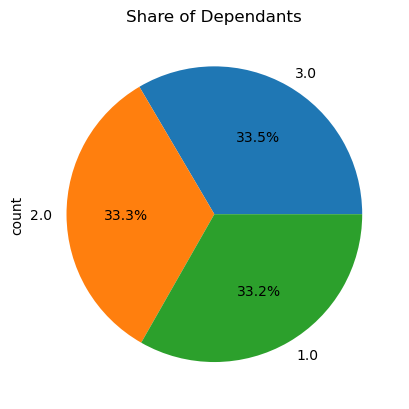

In [48]:
pie_dependants_qty = IC_full_merge2['dependants_qty'].value_counts().plot.pie(autopct='%1.1f%%', title='Share of Dependants')

In [49]:
# save image

pie_dependants_qty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profiliing_dependants_pie.png'))

### Profiling Department id goods

In [71]:
# create a profiling table in reference for aggregation 

IC_full_merge2.loc[:,["product_name", "department_id", "orders_day_of_week"]]

,product_name,department_id,orders_day_of_week
0,Soda,7,1
1,Soda,7,5
2,Soda,7,1
3,Clementines,4,2
4,Clementines,4,3
...,...,...,...
32404813,Fresh Mint Toothpaste,11,0
32404814,Fresh Mint Toothpaste,11,5
32404815,Fresh Mint Toothpaste,11,6
32404816,Favorites Super Moist Butter Recipe Yellow Cak...,13,6


In [50]:
IC_full_merge2.groupby('department_id').agg({'orders_day_of_week': ['mean', 'min', 'max']})

orders_day_of_week        
                            mean min max
department_id                           
1                       2.792869   0   6
2                       2.853012   0   6
3                       2.745236   0   6
4                       2.687693   0   6
5                       3.165253   0   6
6                       2.692466   0   6
7                       2.807342   0   6
8                       2.934730   0   6
9                       2.693114   0   6
10                      2.761532   0   6
11                      2.817910   0   6
12                      2.720062   0   6
13                      2.812745   0   6
14                      2.733453   0   6
15                      2.710028   0   6
16                      2.742587   0   6
17                      2.835935   0   6
18                      2.713160   0   6
19                      2.753274   0   6
20                      2.708570   0   6
21                      2.804008   0   6

In [53]:
IC_full_merge2['orders_day_of_week'].value_counts()

orders_day_of_week
0    5908610
1    5411686
6    4291304
5    4033729
2    4024706
3    3669535
4    3624994
Name: count, dtype: int64

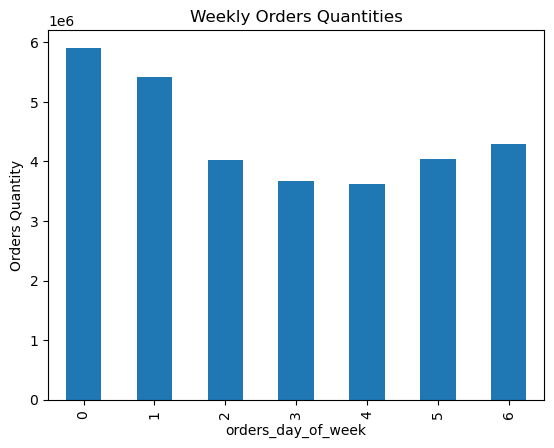

In [58]:
# creating a bar chart to visualize orders per day of the week

plt.title('Weekly Orders Quantities')

plt.ylabel('Orders Quantity')

plt.xlabel('Orders day of week')

weekly_orders = IC_full_merge2['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [59]:
# save image

weekly_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Profiliing_weekly_orders_bar.png'))

In [60]:
# create profile variables 

def profile_variable(row):

 if (row['Age'] <33) and (row['income'] <67292) and (row ['Dependants'] ==1):
    return 'Young Adult, Low income, 1 Dependants'
 elif (row['Age'] <33) and (row['income'] <67292) and (row ['Dependants'] ==2):
    return 'Young Adult, Low income, 2 Dependants'
 elif (row['Age'] <33) and (row['income'] <67292) and (row ['Dependants'] ==3):
    return 'Young Adult, Low income, 3 Dependants'
 elif (row['Age'] <33) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==1):
    return 'Young Adult, Median income, 1 Dependants'
 elif (row['Age'] <33) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==2):
    return 'Young Adult, Median income, 2 Dependants'
 elif (row['Age'] <33) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==3):
    return 'Young Adult, Median income, 3 Dependants'
 elif (row['Age'] <33) and (row['income'] >=128102) and (row ['Dependants'] ==1):
    return 'Young Adult, High income, 1 Dependants'
 elif (row['Age'] <33) and (row['income'] >=128102) and (row ['Dependants'] ==2):
    return 'Young Adult, High income, 2 Dependants'
 elif (row['Age'] <33) and (row['income'] >=128102) and (row ['Dependants'] ==3):
    return 'Young Adult, High income, 3 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] <67292) and (row ['Dependants'] ==1):
    return 'Adult, Low income, 1 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] <67292) and (row ['Dependants'] ==2):
    return 'Adult, Low income, 2 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] <67292) and (row ['Dependants'] ==3):
    return 'Adult, Low income, 3 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==1):
    return 'Adult, Median income, 1 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==2):
    return 'Adult, Median income, 2 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==3):
    return 'Adult, Median income, 3 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] >=128102) and (row ['Dependants'] ==1):
    return 'Adult, High income, 1 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] >=128102) and (row ['Dependants'] ==2):
    return 'Adult, High income, 2 Dependants'
 elif (row['Age'] >=33) and (row['Age'] <65) and (row['income'] >=128102) and (row ['Dependants'] ==3):
    return 'Adult, High income, 3 Dependants'
 elif (row['Age'] >=65) and (row['income'] <67292) and (row ['Dependants'] ==1):
    return 'Senior Adult, Low income, 1 Dependants'
 elif (row['Age'] >=65) and (row['income'] <67292) and (row ['Dependants'] ==2):
    return 'Senior Adult, Low income, 2 Dependants'
 elif (row['Age'] >=65) and (row['income'] <67292) and (row ['Dependants'] ==3):
    return 'Senior Adult, Low income, 3 Dependants'
 elif (row['Age'] >=65) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==1):
    return 'Senior Adult, Low Median income, 1 Dependants'
 elif (row['Age'] >=65) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==2):
    return 'Senior Adult, Median income, 2 Dependants'
 elif (row['Age'] >=65) and (row['income'] >=67292) and (row['income'] <128102) and (row ['Dependants'] ==3):
    return 'Senior Adult, Median income, 3 Dependants'
 elif (row['Age'] >=65) and (row['income'] >=128102) and (row ['Dependants'] ==1):
    return 'Senior Adult, High income, 1 Dependants'
 elif (row['Age'] >=65) and (row['income'] >=128102) and (row ['Dependants'] ==2):
    return 'Senior Adult, High income, 2 Dependants'
 elif (row['Age'] >=65) and (row['income'] >=128102) and (row ['Dependants'] ==3):
    return 'Senior Adult, High income, 3 Dependants'

In [72]:
#changing datatype

IC_full_merge2['Age'] = IC_full_merge2['Age'].astype('int8')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13188\2372352761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IC_full_merge2['Age'] = IC_full_merge2['Age'].astype('int8')


In [76]:
# changing datatype

IC_full_merge2['income'] = IC_full_merge2['income'].astype('int16')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13188\236646000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IC_full_merge2['income'] = IC_full_merge2['income'].astype('int16')


In [74]:
# changing datatype

IC_full_merge2['Dependants'] = IC_full_merge2['Dependants'].astype('int8')

C:\Users\Asus\AppData\Local\Temp\ipykernel_13188\247557971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IC_full_merge2['Dependants'] = IC_full_merge2['Dependants'].astype('int8')


In [83]:
# create a subset to address memory issues due to size od dataframe

subset = IC_full_merge2[['Dependants', 'Age', 'income']]


In [84]:
# create profile column calles "subset". Axis = 1 is all rows, axis = 0 is all columns


subset['profiles'] = subset.apply(profile_variable, axis=1)                                        

C:\Users\Asus\AppData\Local\Temp\ipykernel_13188\2541515150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['profiles'] = subset.apply(profile_variable, axis=1)


In [86]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404817
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Dependants  int8  
 1   Age         int8  
 2   income      int16 
 3   profiles    object
dtypes: int16(1), int8(2), object(1)
memory usage: 590.6+ MB


In [87]:
subset['profiles'].value_counts(dropna = False)

profiles
None                                      7739681
Adult, Low income, 3 Dependants           3888158
Adult, Low income, 1 Dependants           3878960
Adult, Low income, 2 Dependants           3815801
Senior Adult, Low income, 2 Dependants    2093847
Senior Adult, Low income, 3 Dependants    2050750
Senior Adult, Low income, 1 Dependants    2028989
Young Adult, Low income, 3 Dependants     1833608
Young Adult, Low income, 2 Dependants     1823613
Young Adult, Low income, 1 Dependants     1811157
Name: count, dtype: int64

In [88]:
IC_full_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404817
Data columns (total 38 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 int32         
 1   First Name              object        
 2   Surname                 object        
 3   Gender                  object        
 4   State                   object        
 5   Age                     int8          
 6   Date_joined             datetime64[ns]
 7   Dependants              int8          
 8   Family_status           object        
 9   income                  int16         
 10  product_id              int64         
 11  product_name            object        
 12  aisle_id                int64         
 13  department_id           int64         
 14  prices                  float64       
 15  order_id                int32         
 16  order_number            int8          
 17  orders_day_of_week      int8          
 18  order